## Importing the dependencies 

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Data  Collection 

In [2]:
mls = pd.read_csv('Mall_Customers.csv')

In [3]:
mls.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [4]:
mls.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
mls.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization 

<Axes: xlabel='Gender', ylabel='count'>

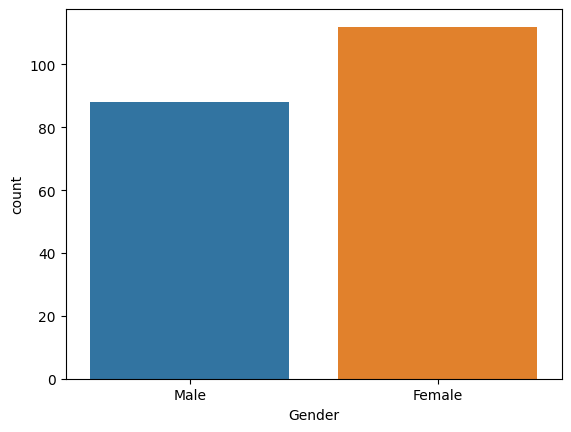

In [6]:
# difference between the number of female and male
sns.countplot(x='Gender', data= mls)

### Number of females are greater than males for doing shopping

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

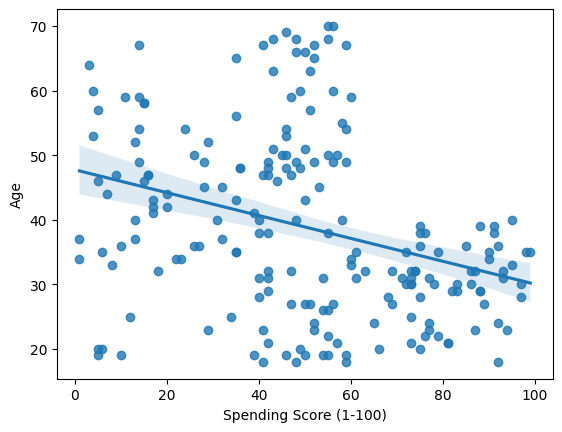

In [7]:
# finding the relation between age & spending score 
sns.regplot(x='Spending Score (1-100)', y = 'Age', data = mls)

### There exist an inversily proportional relation between "Age & Spending Score", and the highest Spending Score is between 40 and 60 Age

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

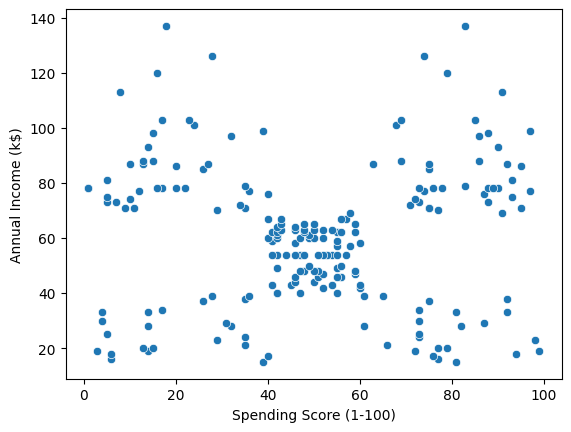

In [8]:
# finding the relation between Annual Income & spending score 
sns.scatterplot(x='Spending Score (1-100)', y = 'Annual Income (k$)', data = mls)

### Now as abviouse we need to find the relation between annual income and spending score; so we need to clustering data using K-Means clustering 

In [9]:
x = mls[['Annual Income (k$)','Spending Score (1-100)']]

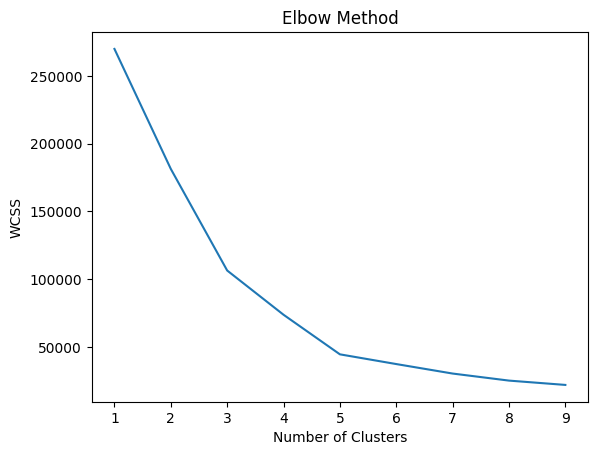

In [10]:
# finding an appropriate number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

# Plot the Elbow Curve
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### From the graph we find that appropriate number of clusters is: k = 5

In [11]:
# Standardized Data 
scaler = StandardScaler()

In [12]:
standardized_data = scaler.fit_transform(x)

In [13]:
x = standardized_data

In [14]:
# K-means clustering 
k = 5  
k_m = KMeans(n_clusters=k)

Annual_income_clustre = k_m.fit_predict(x)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
Annual_income_clustre

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [16]:
centroids = k_m.cluster_centers_
centroids

array([[-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

In [17]:
mls['Annual_income_class'] = Annual_income_clustre

In [18]:
mls.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual_income_class
190,191,Female,34,103,23,2
191,192,Female,32,103,69,3
192,193,Male,33,113,8,2
193,194,Female,38,113,91,3
194,195,Female,47,120,16,2
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2
199,200,Male,30,137,83,3


In [19]:
# seprating Annual_income_class into 5 classes
class_1 = mls[mls.Annual_income_class==0]
class_2 = mls[mls.Annual_income_class==1]
class_3 = mls[mls.Annual_income_class==2]
class_4 = mls[mls.Annual_income_class==3]
class_5 = mls[mls.Annual_income_class==4]

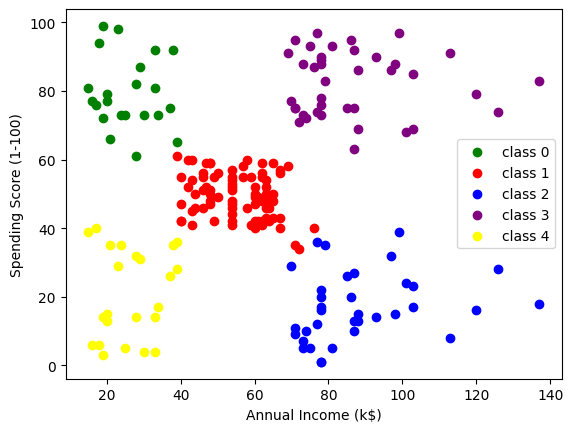

In [20]:
# plotting a graph for this classes according to Annual Income and Spending Score

plt.scatter(class_1['Annual Income (k$)'],class_1['Spending Score (1-100)'],color="green",label="class 0")
plt.scatter(class_2['Annual Income (k$)'],class_2['Spending Score (1-100)'],color="red",label="class 1")
plt.scatter(class_3['Annual Income (k$)'],class_3['Spending Score (1-100)'],color="blue",label="class 2")
plt.scatter(class_4['Annual Income (k$)'],class_4['Spending Score (1-100)'],color="purple",label="class 3")
plt.scatter(class_5['Annual Income (k$)'],class_5['Spending Score (1-100)'],color="yellow",label="class 4")

plt.legend()


plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")


plt.show()

## Conclution:-
* class 0: They have low anual income, but they prefer shopping
* class 1: They have an annual income that is not much or little, and they spend their money on their priority
* class 2: They have a large annual income, but they do not prefer to spend their money a lot They keep spending it on their priorities
* class 3: They have a large annual income, and they prefer to spend their money a lot and love shopping 
* class 4: They have low anual income, and they spend their money on their priority